<a href="https://colab.research.google.com/github/deeagjin/Project-2-Data-Science/blob/main/P138002_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

The aviation industry is a vital component of modern-day transportation, facilitating travel and commerce across vast distances. However, flight delays and cancellations can significantly disrupt travel plans, leading to inconvenience for passengers and operational challenges for airlines. In the pursuit of enhancing efficiency and passenger experience, analyzing historical flight data becomes imperative to identify trends, patterns, and underlying factors contributing to delays and cancellations.

The dataset available on Kaggle, titled "Data Expo 2009: Airline on-time data," provides a comprehensive repository of flight information spanning the year 2005. This dataset encompasses a wealth of data points, including flight schedules, departure and arrival times, reasons for delays and cancellations, airline performance metrics, and more. By leveraging this dataset, aviation analysts and industry stakeholders can gain valuable insights into the dynamics of flight operations and uncover strategies to mitigate delays and cancellations effectively.



# **Objectives**

The objectives of this research are to determine what is the optimal times of day, days of the week an d times of the year for minimizing flight delays. Next, we are going to determining the primary factors contributing to flight delays and what factors that contribute mostly to flight cancellations. Lastly, the purpose of this research are to determining which flights experiences the most frequent and significant delays and cancellations.

# **Objectives 1**

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Load CSV Files
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
folder_path = '/content/drive/My Drive/P138002_Assignment2/'  # Replace with your folder name
data_month = pd.read_csv(os.path.join(folder_path, 'optimal_year(month).csv'))
data_week = pd.read_csv(os.path.join(folder_path, 'optimal_week.csv'))
data_hour = pd.read_csv(os.path.join(folder_path, 'optimal_day.csv'))

In [12]:
data_week

,dayofweek,avgarrdelay
0,6,3.301072
1,2,5.367869
2,7,6.454012
3,3,7.556946
4,1,7.860761
5,5,9.514468
6,4,9.672332


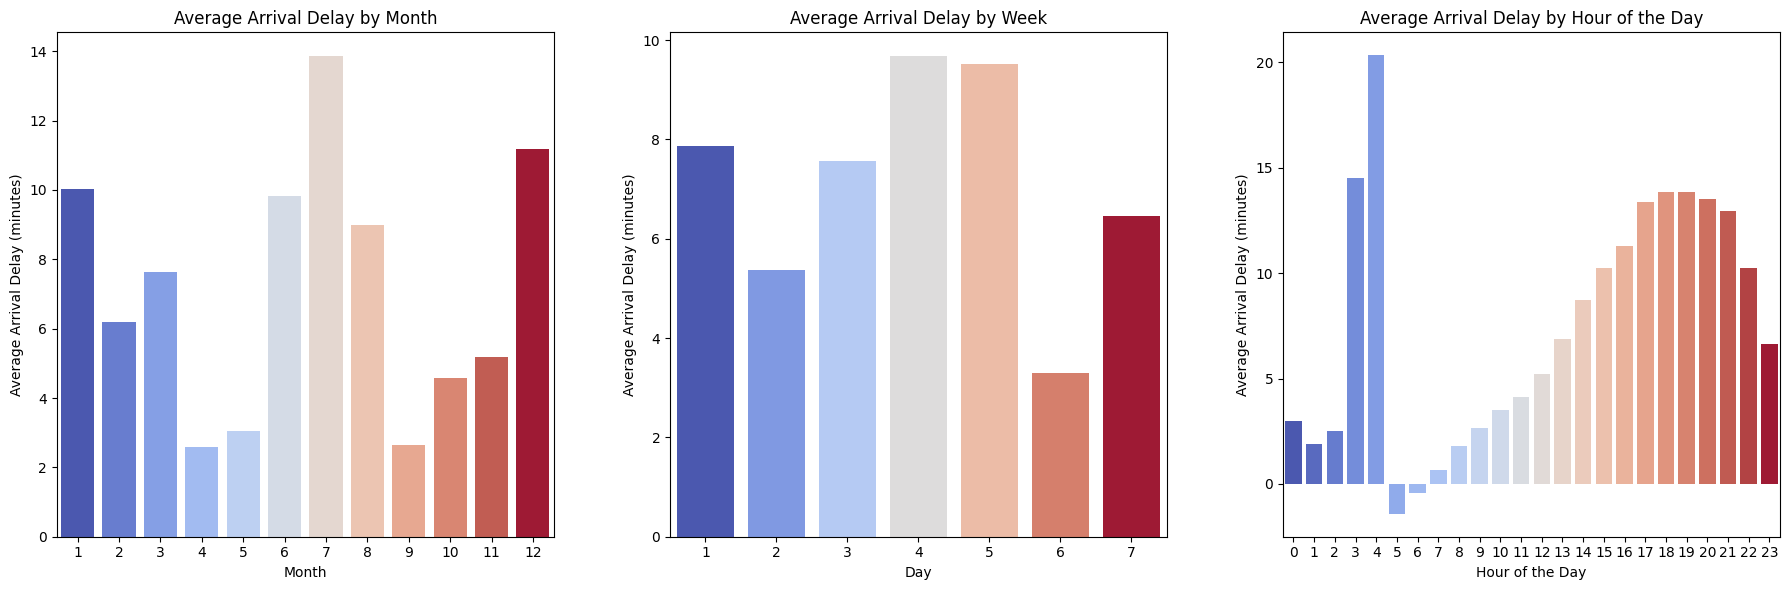

In [13]:
# Plot Average Arrival Delay by Month
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.barplot(x='month', y='avgarrdelay', data=data_month, hue='month', palette='coolwarm', dodge=False, legend=False)
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Arrival Delay (minutes)')

plt.subplot(1, 3, 2)
sns.barplot(x='dayofweek', y='avgarrdelay', data=data_week, hue='dayofweek', palette='coolwarm', dodge=False, legend=False)
plt.title('Average Arrival Delay by Week')
plt.xlabel('Day')
plt.ylabel('Average Arrival Delay (minutes)')

plt.subplot(1, 3, 3)
sns.barplot(x='hour', y='avgarrdelay', data=data_hour, hue='hour', palette='coolwarm', dodge=False, legend=False)
plt.title('Average Arrival Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Arrival Delay (minutes)')

plt.tight_layout(w_pad=5);
plt.show();

## **Discussion**

To optimize travel plans and minimize the inconvenience caused by flight delays, it's essential to consider the most favorable times of the year, days of the week, and hours of the day based on historical data.

Based on the visualizations above, analyzing the data reveals that certain months exhibit significantly lower average arrival delays compared to others. April, September, and May emerge as the months with the most favorable conditions, boasting average delays of just around 2.6 to 3 minutes. Conversely, July, December, and January stand out for their considerably higher average delays, reaching up to 13.9 minutes in July.

Moving to the optimal days of the week, Saturday, Tuesday, and Sunday are identified as the best choices for travelers seeking to minimize delays. Saturday boasts the lowest average delay of approximately 3.3 minutes, followed closely by Tuesday and Sunday. In contrast, Thursday and Friday present the least favorable options, with average delays exceeding 9.5 minutes.

Furthermore, delving into the optimal times of day unveils specific hours that offer notably smoother travel experiences. Early morning flights, particularly those departing between 5 AM and 7 AM, showcase the lowest average delays, with some even arriving ahead of schedule. In contrast, the early hours of 3 AM and 4 AM present the highest average delays, making them less desirable options for travelers aiming to avoid disruptions.

In summary, travelers looking to minimize flight delays should consider booking their trips during the favorable months of April, September, and May, preferably on Saturdays, Tuesdays, or Sundays, and opt for early morning departures between 5 AM and 7 AM. By strategically planning travel around these optimal times, passengers can enhance their overall travel experience and reduce the likelihood of encountering delays.

# **Objective 2**

In [14]:
folder_path2 = '/content/drive/My Drive/P138002_Assignment2/'  # Replace with your folder name
avg_delay = pd.read_csv(os.path.join(folder_path2, 'avg_delay.csv'))
corr_delay = pd.read_csv(os.path.join(folder_path2, 'corr.csv'))

In [15]:
avg_delay

,_u1.delaytype,_u1.avgdelay
0,CarrierDelay,32.555027
1,WeatherDelay,42.318652
2,NASDelay,26.801539
3,SecurityDelay,21.283386
4,LateAircraftDelay,41.457890


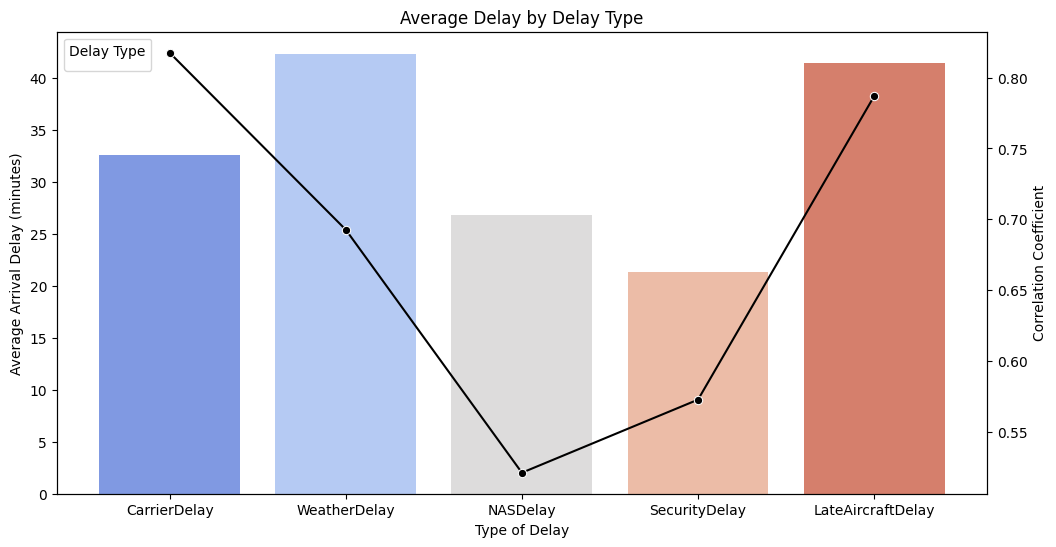

In [16]:
plt.figure(figsize=(12, 6))

# Bar plot for average delay
sns.barplot(x='_u1.delaytype', y='_u1.avgdelay', data=avg_delay, hue='_u1.delaytype', palette='coolwarm', dodge=False)
plt.title('Average Delay by Delay Type')
plt.xlabel('Type of Delay')
plt.ylabel('Average Arrival Delay (minutes)')
plt.legend(title='Delay Type')

# Line plot for correlation
plt.twinx()
sns.lineplot(x='_u1.delaytype', y='_u1.correlation', data=corr_delay, color='black', marker='o')
plt.ylabel('Correlation Coefficient')

plt.show();

# **Discussion**

The primary factors contributing to flight delays can be analyzed from two perspectives: the average delay time and the correlation between delay types and overall delay time.

1. **Average Delay Time:**
   - **Carrier Delay:** This refers to delays caused by issues within the control of the airline, such as maintenance problems, crew scheduling, or aircraft cleaning. The average delay time for carrier-related issues is approximately 32.56 minutes. These delays are significant and suggest that operational issues within the airline contribute notably to delays.
   
   - **Weather Delay:** Weather-related delays occur due to adverse weather conditions, such as storms, fog, or extreme winds, which affect the safety and efficiency of flight operations. The average delay time attributed to weather is approximately 42.32 minutes. Weather delays tend to be significant and unpredictable, impacting flight schedules across regions.
   
   - **NAS Delay (National Airspace System):** Delays attributed to the NAS occur due to congestion, air traffic control (ATC) issues, or airport infrastructure problems. The average delay time due to NAS-related issues is around 26.80 minutes. These delays highlight challenges within the air traffic management system and airport infrastructure.
   
   - **Security Delay:** Security-related delays occur due to security threats, suspicious activities, or breaches in security protocols. The average delay time attributed to security issues is approximately 21.28 minutes. While these delays are relatively shorter compared to other factors, they underscore the importance of stringent security measures at airports.
   
   - **Late Aircraft Delay:** This refers to delays caused by the late arrival of the aircraft from a previous flight, which affects subsequent departures. The average delay time attributed to late aircraft arrivals is around 41.46 minutes. These delays indicate the ripple effect of delays within the airline's operational network.
   
2. **Correlation Analysis:**
   - The correlation coefficients measure the strength and direction of the linear relationship between delay types and overall delay time.
   - A correlation coefficient close to 1 indicates a strong positive linear relationship, suggesting that as one variable increases, the other also tends to increase.
   - From the correlation analysis:
     - **Carrier Delay** has a high positive correlation of approximately 0.82 with overall delay time. This indicates that carrier-related delays strongly influence the total delay time of flights.
     - **Late Aircraft Delay** also shows a strong positive correlation of about 0.79 with overall delay time, indicating that delays due to late aircraft arrivals significantly contribute to the total delay time.
     - **Weather Delay** and **NAS Delay** also have positive correlations (around 0.69 and 0.52, respectively), albeit slightly lower than carrier and late aircraft delays, indicating their influence on overall delay time but to a slightly lesser extent.
     - **Security Delay** shows a moderate positive correlation of about 0.57 with overall delay time, suggesting that security-related delays also contribute, although to a lesser degree compared to other factors.


The analysis of flight delay data reveals several primary factors that significantly contribute to delays in air travel. Among these factors, CarrierDelay emerges as the leading contributor, exhibiting the highest correlation coefficient of 0.82. This suggests a strong positive linear relationship between carrier-related issues and overall flight delays. Following closely behind is LateAircraftDelay, with a correlation coefficient of 0.79, indicating its substantial impact on delays. WeatherDelay, while slightly less correlated at 0.69, still demonstrates a notable influence on flight delays, particularly in adverse weather conditions. NASDelay, with a correlation coefficient of 0.52, and SecurityDelay, with a coefficient of 0.57, also contribute to delays, albeit to a lesser extent compared to carrier and aircraft-related issues. Overall, CarrierDelay and LateAircraftDelay emerge as the primary factors driving flight delays, underscoring the importance of addressing operational and logistical challenges within airlines and optimizing aircraft turnaround times to minimize disruptions in air travel.

In summary, carrier-related issues, late aircraft arrivals, adverse weather conditions, NAS-related problems, and security-related issues are the primary factors contributing to flight delays. These factors not only lead to significant average delay times but also exhibit strong positive correlations with overall delay time, highlighting their substantial impact on flight operations and passenger experiences. Addressing these factors through improved operational efficiency, infrastructure enhancements, and contingency planning can help mitigate flight delays and improve the reliability of air travel.

# **Objective 3**

In [17]:
folder_path3 = '/content/drive/My Drive/P138002_Assignment2/'  # Replace with your folder name
cancel_uniquecarrier_data = pd.read_csv(os.path.join(folder_path3, 'cancel_uniquecarrier.csv'))
cancel_dayofweek_data = pd.read_csv(os.path.join(folder_path3, 'cancelled_dayofweek.csv'))
cancel_month_data = pd.read_csv(os.path.join(folder_path3, 'cancel_month.csv'))
cancel_code_data = pd.read_csv(os.path.join(folder_path3, 'cancel_code.csv'))

In [15]:
cancel_code_data

,factor,value,cancellationcount
0,CancellationCode,C,23084
1,CancellationCode,D,92
2,CancellationCode,B,51204
3,CancellationCode,A,59350


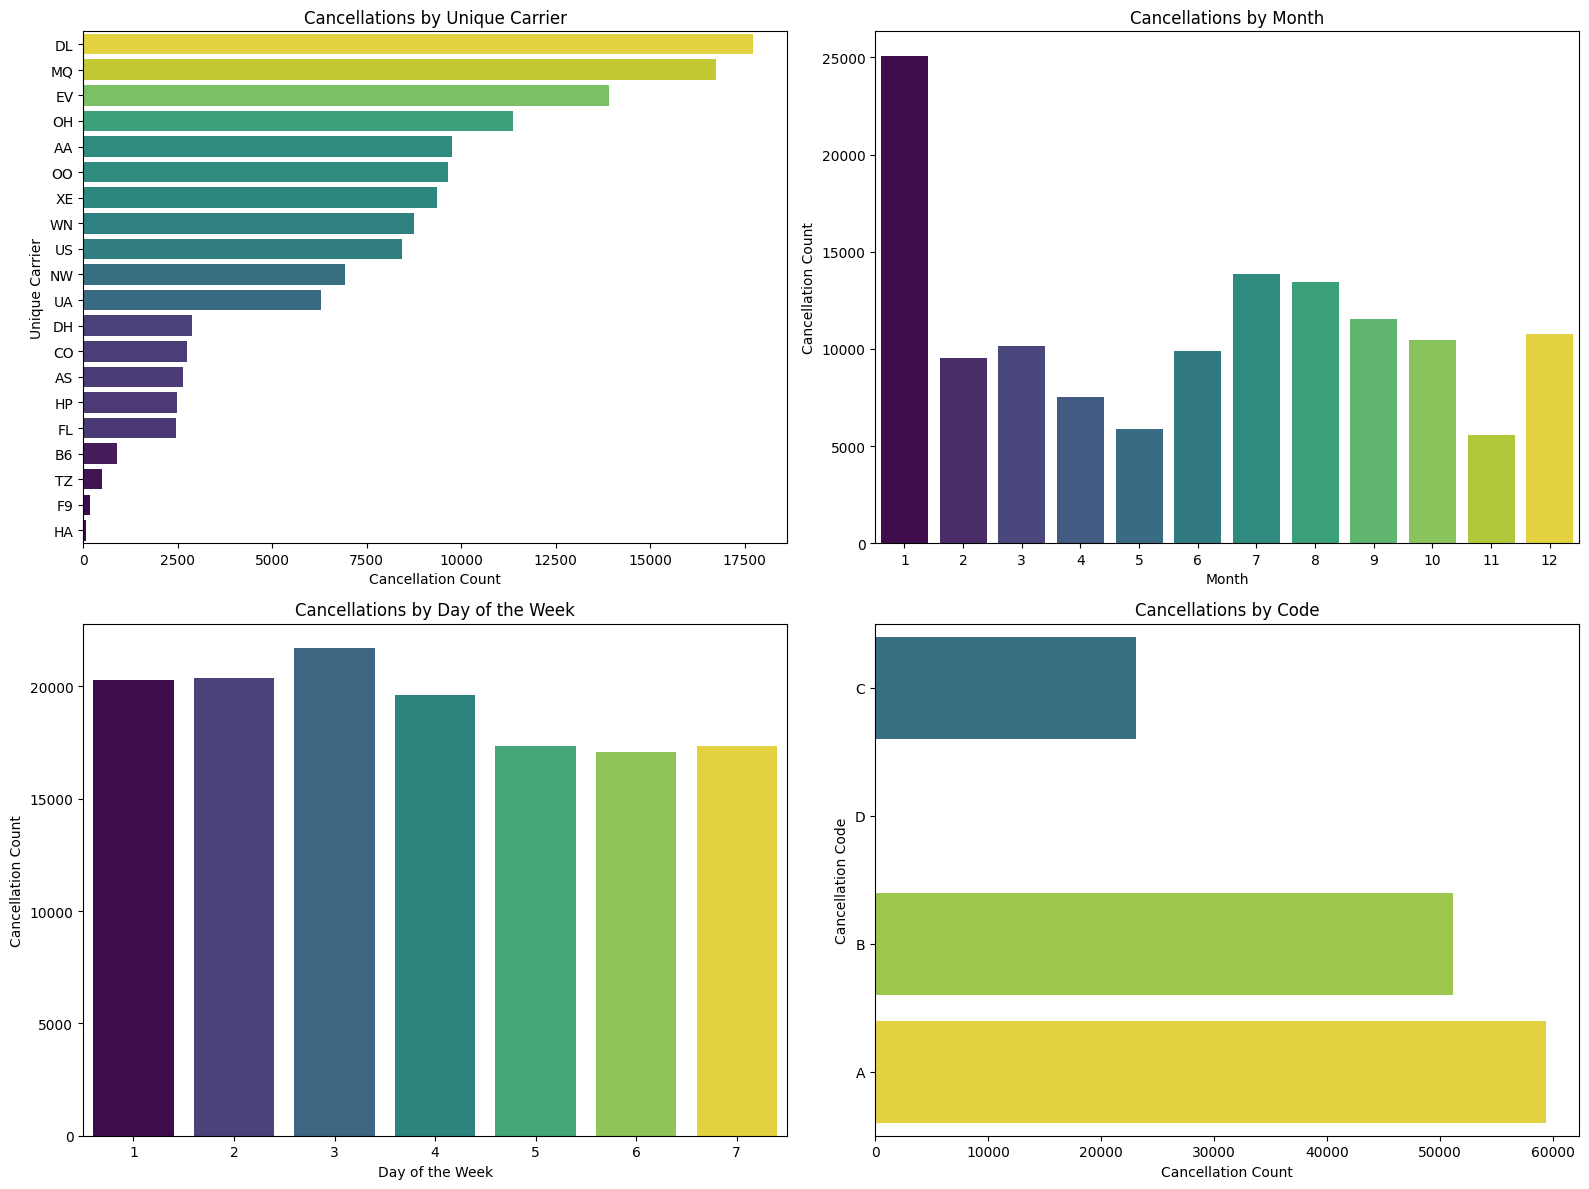

In [18]:
# Plotting
plt.figure(figsize=(16, 12))

# Plot for Unique Carriers
plt.subplot(2, 2, 1)
sns.barplot(x='cancellationcount', y='value', data=cancel_uniquecarrier_data, hue='cancellationcount', palette='viridis', legend=False)
plt.title('Cancellations by Unique Carrier')
plt.xlabel('Cancellation Count')
plt.ylabel('Unique Carrier')

# Plot for Months
plt.subplot(2, 2, 2)
sns.barplot(x='value', y='cancellationcount', data=cancel_month_data, hue='value', palette='viridis', legend=False)
plt.title('Cancellations by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Count')

# Plot for Days of the Week
plt.subplot(2, 2, 3)
sns.barplot(x='value', y='cancellationcount', data=cancel_dayofweek_data, hue='value', palette='viridis', legend=False)
plt.title('Cancellations by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Count')

# Plot for Cancellation Codes
plt.subplot(2, 2, 4)
sns.barplot(x='cancellationcount', y='value', data=cancel_code_data, hue='cancellationcount', palette='viridis', legend=False)
plt.title('Cancellations by Code')
plt.xlabel('Cancellation Count')
plt.ylabel('Cancellation Code')

plt.tight_layout()
plt.show();


# **Discussion**

### Detailed Explanation of Visualizations

1. **Cancellations by Unique Carrier:**
   - **Delta Airlines (DL):** With 17,731 cancellations, Delta Airlines experiences the highest number of cancellations among all carriers. This could be due to a variety of factors including operational issues, route complexity, and fleet management.
   - **Envoy Air (MQ):** The second highest with 16,746 cancellations, Envoy Air may face challenges related to regional operations and weather impacts.
   - **ExpressJet Airlines (EV):** With 13,900 cancellations, ExpressJet is another carrier significantly affected by cancellations. Regional carriers often face higher cancellation rates due to smaller aircraft and more frequent weather-related disruptions.
   - **Other Carriers:** Carriers like American Airlines (AA), SkyWest Airlines (OO), and Southwest Airlines (WN) also have substantial cancellation counts, indicating that large, national carriers are not immune to operational challenges.

2. **Cancellations by Month:**
   - **January (Month 1):** With 25,084 cancellations, January is the peak month for cancellations. This is likely due to severe winter weather conditions, including snowstorms and ice, which disrupt flights.
   - **July (Month 7):** The summer month of July has 13,851 cancellations, possibly due to thunderstorms and increased travel volume.
   - **August (Month 8) and September (Month 9):** These months also see high cancellation rates, often due to late summer storms and hurricanes.
   - **Other Months:** Months like October (Month 10) and December (Month 12) also show elevated cancellation counts, reflecting holiday travel disruptions and early winter weather.

3. **Cancellations by Day of the Week:**
   - **Wednesday (Day 3):** With 21,698 cancellations, Wednesdays see the highest number of cancellations. This could be related to mid-week operational adjustments and maintenance schedules.
   - **Tuesday (Day 2) and Monday (Day 1):** Early in the week, there are also significant cancellations (20,381 and 20,277 respectively), possibly due to carry-over effects from weekend operations and early week demand.
   - **Other Days:** Days like Thursday (Day 4) and Friday (Day 5) show slightly lower cancellations, but weekends (Saturday - Day 6 and Sunday - Day 7) have the lowest counts, potentially due to less scheduled maintenance and different operational strategies.

4. **Cancellations by Code:**
   - **Weather-related (Code 'B'):** With 51,204 cancellations, weather is the leading cause of flight cancellations. This includes storms, snow, and other adverse conditions that make flying unsafe.
   - **Carrier-related (Code 'A'):** Carrier-related issues account for 59,350 cancellations. This category includes mechanical failures, crew availability, and other operational problems within the airline's control.
   - **National Air System (NAS) Delays (Code 'C'):** NAS-related issues, including air traffic control problems and airport congestion, contribute to 23,084 cancellations. These delays are often beyond the control of individual airlines.
   - **Security (Code 'D'):** Security-related cancellations are relatively rare, with only 92 instances, reflecting specific security incidents or threats.




### Factors Predominantly Leading to Flight Cancellations

Analyzing the provided data on flight cancellations, we can identify the key factors that predominantly lead to cancellations and rank them accordingly:

1. **Carrier-Related Issues (Code 'A'):**
   - **Cancellation Count:** 59,350
   - **Description:** This is the most significant factor contributing to flight cancellations. Carrier-related issues include mechanical failures, crew unavailability, and other operational problems that are within the control of the airline. These disruptions can be mitigated by improving maintenance processes, ensuring adequate staffing, and enhancing overall operational efficiency.

2. **Weather-Related Issues (Code 'B'):**
   - **Cancellation Count:** 51,204
   - **Description:** Adverse weather conditions are the second most common cause of flight cancellations. This includes events like snowstorms, thunderstorms, hurricanes, and other severe weather that makes flying unsafe. Airlines and airports can reduce weather-related cancellations by investing in better forecasting tools, improving de-icing procedures, and ensuring flexibility in scheduling to accommodate weather disruptions.

3. **National Air System (NAS) Delays (Code 'C'):**
   - **Cancellation Count:** 23,084
   - **Description:** NAS-related delays involve issues with air traffic control, airport capacity, and other systemic problems in the national airspace. These delays are often beyond the control of individual airlines but can be addressed through improvements in air traffic management, expanding airport infrastructure, and optimizing flight scheduling.

4. **Security-Related Issues (Code 'D'):**
   - **Cancellation Count:** 92
   - **Description:** Security-related cancellations, though relatively rare, occur due to specific incidents or threats that necessitate grounding flights for safety. While the count is low compared to other factors, maintaining robust security protocols and ensuring quick, effective responses to security threats remain essential.

### Conclusion

From the data, it is clear that carrier-related issues are the leading cause of flight cancellations, followed closely by weather-related issues. NAS delays also play a significant role, while security-related cancellations are comparatively rare. By focusing on mitigating carrier and weather-related disruptions, airlines can significantly reduce the number of flight cancellations and improve overall reliability.


# **Objective 4**

In [19]:
folder_path4 = '/content/drive/My Drive/P138002_Assignment2/'  # Replace with your folder name
question4 = pd.read_csv(os.path.join(folder_path4, 'question4.csv'))


In [23]:
question4

,uniquecarrier,flightnum,totaldelays,totalcancellations
0,WN,371,1056,1
1,WN,1179,1033,6
2,WN,783,1025,6
3,AS,64,1011,49
4,WN,1883,992,5
...,...,...,...,...
25243,WN,3447,0,0
25244,WN,3980,0,0
25245,WN,3253,0,0
25246,US,797,0,0


Delay Data:
  delaycategory    Count  Percentage
0     LongDelay  3009152   98.234865
1   MediumDelay    35196    1.148986
2    ShortDelay    18874    0.616149

Cancellation Data:
   UniqueCarrier  Count  Percentage
0             AA   9752    7.292305
1             AS   2630    1.966649
2             B6    888    0.664025
3             CO   2739    2.048157
4             DH   2877    2.151350
5             DL  17731   13.258805
6             EV  13900   10.394078
7             F9    175    0.130861
8             FL   2448    1.830554
9             HA     69    0.051597
10            HP   2487    1.859717
11            MQ  16746   12.522246
12            NW   6937    5.187318
13            OH  11370    8.502206
14            OO   9639    7.207807
15            TZ    508    0.379870
16            UA   6296    4.707994
17            US   8426    6.300755
18            WN   8759    6.549764
19            XE   9353    6.993943


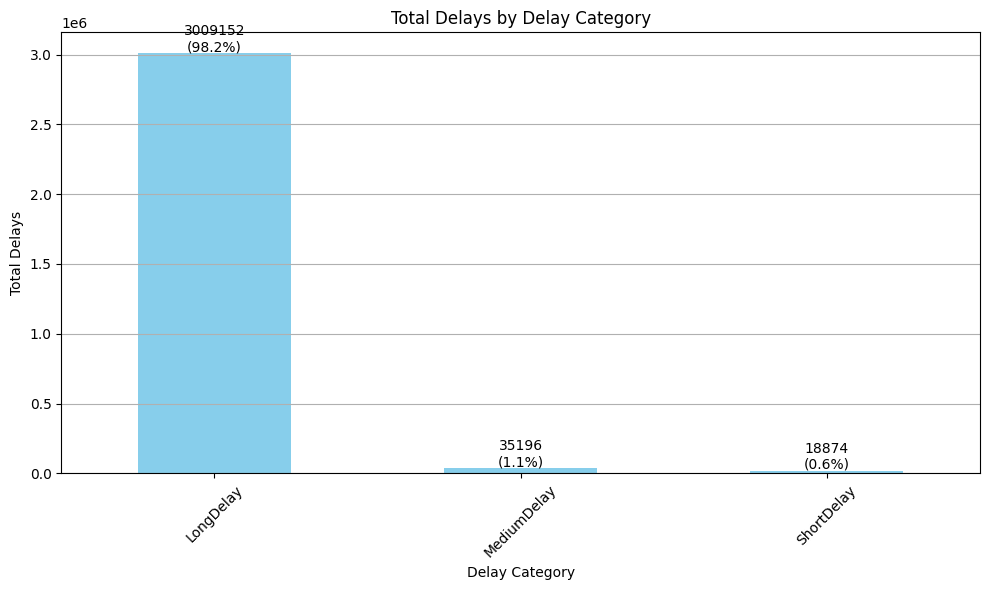

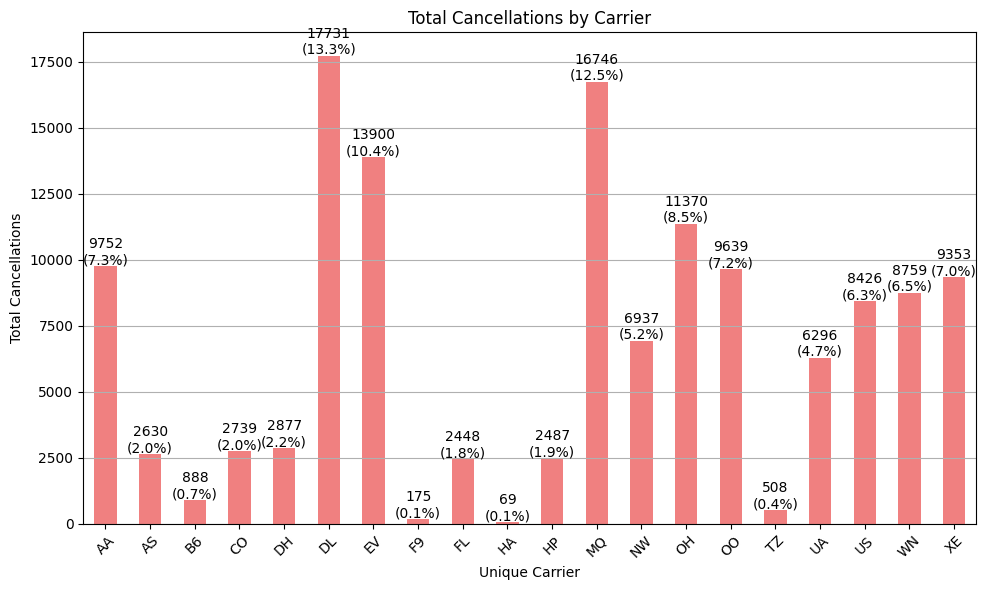

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Create categories for delays
def categorize_delay(delay):
    if delay <= 15:
        return "ShortDelay"
    elif delay <= 30:
        return "MediumDelay"
    else:
        return "LongDelay"


results = pd.read_csv('/content/drive/My Drive/P138002_Assignment2/question4.csv')

# Categorize delays
results['delaycategory'] = results['totaldelays'].apply(categorize_delay)

# Count and percentage calculation for delays
delay_counts = results.groupby('delaycategory')['totaldelays'].sum()
total_delays = delay_counts.sum()
delay_percentages = (delay_counts / total_delays) * 100

# Store delays calculations in a DataFrame
delay_data = pd.DataFrame({
    'Count': delay_counts,
    'Percentage': delay_percentages
}).reset_index()

# Count and percentage calculation for cancellations
cancel_counts = results.groupby('uniquecarrier')['totalcancellations'].sum()
total_cancellations = cancel_counts.sum()
cancel_percentages = (cancel_counts / total_cancellations) * 100

# Store cancellations calculations in a DataFrame
cancel_data = pd.DataFrame({
    'UniqueCarrier': cancel_counts.index,
    'Count': cancel_counts.values,
    'Percentage': cancel_percentages.values
})

# Print the calculated DataFrames
print("Delay Data:")
print(delay_data)
print("\nCancellation Data:")
print(cancel_data)

# Plot total delays by category with counts and percentages
plt.figure(figsize=(10, 6))
ax = delay_counts.plot(kind='bar', color='skyblue')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height / total_delays:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

ax.set_title('Total Delays by Delay Category')
ax.set_xlabel('Delay Category')
ax.set_ylabel('Total Delays')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot total cancellations by carrier with counts and percentages
plt.figure(figsize=(10, 6))
ax = cancel_counts.plot(kind='bar', color='lightcoral')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}\n({height / total_cancellations:.1%})',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

ax.set_title('Total Cancellations by Carrier')
ax.set_xlabel('Unique Carrier')
ax.set_ylabel('Total Cancellations')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Discussion**

The dataset categorizes flight delays into three distinct classes:

- ShortDelay: Delays that are 15 minutes or less.

- MediumDelay: Delays that are between 16 and 30 minutes.

- LongDelay: Delays that are greater than 30 minutes.

Based on the visualizations:

**LongDelay**: There are 3,009,152 instances of delays longer than 30 minutes. This category dominates the dataset, accounting for 98.23% of all delays. This indicates that long delays are a prevalent issue affecting a significant number of flights.

**MediumDelay**: There are 35,196 instances of delays between 16 and 30 minutes, representing 1.15% of all delays. Although less frequent than LongDelays, they still impact a notable number of flights.

**ShortDelay**: There are 18,874 instances of delays of 15 minutes or less, making up 0.62% of all delays. These are the least frequent but still noteworthy for punctuality metrics.

Cancellation Data:
- The dataset also includes data on flight cancellations by airline. The total number of cancellations and the percentage of total cancellations by each airline are as follows:

- Delta Air Lines (DL): Has the highest number of cancellations, with 17,731 instances, which is 13.26% of all cancellations. This makes Delta the airline with the most significant cancellation issue.
- MQ (Envoy Air): With 16,746 cancellations, accounting for 12.52% of all cancellations.
- EV (ExpressJet Airlines): Records 13,900 cancellations, which is 10.39% of all cancellations.
- OH (Comair): Has 11,370 cancellations, representing 8.50% of the total.
Other airlines with significant numbers of cancellations include AA (American Airlines), OO (SkyWest Airlines), and WN (Southwest Airlines), among others.

**Conclusion:**

Most Frequent and Significant Delays:
- LongDelays (delays > 30 minutes) are the most common type of delay, accounting for 98.23% of all delays. This suggests that flights experiencing long delays are facing the most significant delay issues.

Most Frequent and Significant Cancellations:
- Delta Air Lines (DL) experiences the most frequent and significant cancellations, with 17,731 cancellations accounting for 13.26% of all cancellations. This indicates that Delta has the most substantial problem with flight cancellations.

Recommendations:
- For Passengers: When booking flights, it might be wise to avoid flights operated by Delta Air Lines (DL) due to their higher likelihood of cancellations. Passengers should also be cautious of flights prone to long delays (> 30 minutes), as these are the most common and impactful.
- For Airlines: Airlines should prioritize reducing instances of long delays. Delta Air Lines, in particular, should investigate and address the causes of their high cancellation rates.
